PROGRAM 3) DENOISING AUTO ENCODER AND VAE


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 351s 737ms/step - loss: 0.2337 - val_loss: 0.0995
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 358s 688ms/step - loss: 0.0993 - val_loss: 0.0959
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 397s 719ms/step - loss: 0.0962 - val_loss: 0.0947
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 313s 668ms/step - loss: 0.0948 - val_loss: 0.0934
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 314s 650ms/step - loss: 0.0938 - val_loss: 0.0928
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 310s 662ms/step - loss: 0.0932 - val_loss: 0.0924
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 321s 659ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 322s 660ms/step - loss: 0.0922 - val_loss: 0.0915
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 322s 660ms/step - loss: 0.0917 - val_loss: 0.0915
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 313s 642ms/step - loss: 0.0912 - val_loss: 0.0912
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step


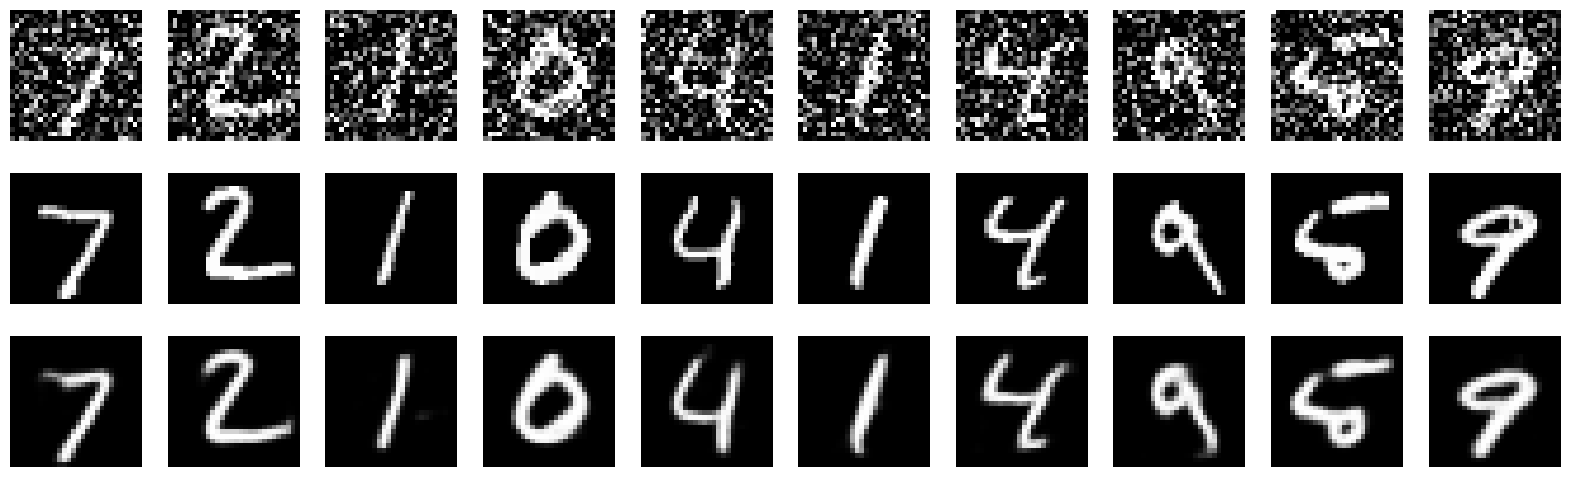

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Adding noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Autoencoder model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)

# Decoder
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_data=(x_test_noisy, x_test))

# Display results
def display_images(noisy, original, decoded, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(decoded[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

# Predict and show results
decoded_imgs = autoencoder.predict(x_test_noisy)
display_images(x_test_noisy, x_test, decoded_imgs)


VERIATIONAL AUTO *ENCODER*

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Hyperparameters
batch_size = 128
learning_rate = 1e-3
epochs = 10
latent_dim = 20

# Data
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# VAE model
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(28*28, 400)
        self.fc21 = nn.Linear(400, latent_dim)  # mu
        self.fc22 = nn.Linear(400, latent_dim)  # logvar
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 28*28)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28*28))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training loop
model = VAE()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model.train()
for epoch in range(epochs):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset):.4f}")


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.34MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.10MB/s]


Epoch 1, Loss: 163.5849
Epoch 2, Loss: 120.9271
Epoch 3, Loss: 114.3988
Epoch 4, Loss: 111.6374
Epoch 5, Loss: 109.8839
Epoch 6, Loss: 108.7664
Epoch 7, Loss: 107.9147
Epoch 8, Loss: 107.2823
Epoch 9, Loss: 106.6600
Epoch 10, Loss: 106.2969


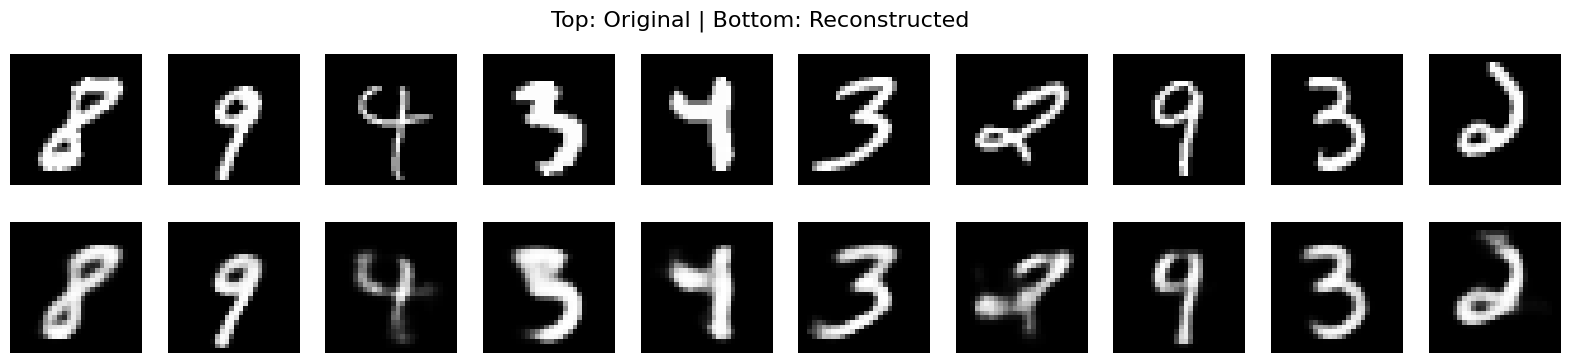

In [9]:
import matplotlib.pyplot as plt

# Switch model to evaluation mode
model.eval()

# Get a batch of test images
test_loader = DataLoader(train_data, batch_size=10, shuffle=True)
data, _ = next(iter(test_loader))

# Get reconstruction
with torch.no_grad():
    recon, _, _ = model(data)

# Plot original and reconstructed images
n = 10  # Number of images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data[i].view(28, 28).numpy(), cmap='gray')
    ax.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon[i].view(28, 28).numpy(), cmap='gray')
    ax.axis('off')

plt.suptitle("Top: Original | Bottom: Reconstructed", fontsize=16)
plt.show()
